# Online Retail Problem Statement

An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.



# Data Loading and  Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


In [2]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('OnlineRetail (3).csv', encoding='latin')

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# DATA CLEANSING

In [9]:
# Calculating the missing values % contribution in df

df_null=round(100*(df.isnull().sum())/len(df),2)

In [10]:
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [11]:
df=df.dropna()

In [12]:
df.shape

(406829, 8)

In [13]:
# Changing the datatype of Customer ID as per Business understanding
df['CustomerID']=df['CustomerID'].astype(str)

In [14]:
# DATA PREPARATION

In [16]:
# New attribute : Monetary
df['Amount']=df['Quantity']*df['UnitPrice']

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [18]:
rfm=df.groupby('CustomerID')['Amount'].sum()
rfm.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [19]:
rfm=rfm.reset_index()
rfm.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [20]:
# New Attribute : Frequency

rfm_f=df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f.head

<bound method NDFrame.head of CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4372, dtype: int64>

In [21]:
rmf_f=rfm_f.reset_index()

In [22]:
rmf_f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [23]:
# Merging the two dataframes created above for frequency and monetary

In [24]:
rfm=pd.merge(rfm,rfm_f,on='CustomerID',how='inner')
rfm.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [25]:
# New attribute : Recency

# Convert to datetime to proper datatype

In [26]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%m/%d/%Y %H:%M')

In [33]:
a = df['Description'].str.split()
df['Type'] = a.apply(lambda x: ' '.join(x[-2:]))

In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,WHITE HEART.


Text(0, 0.5, 'Total Revenue')

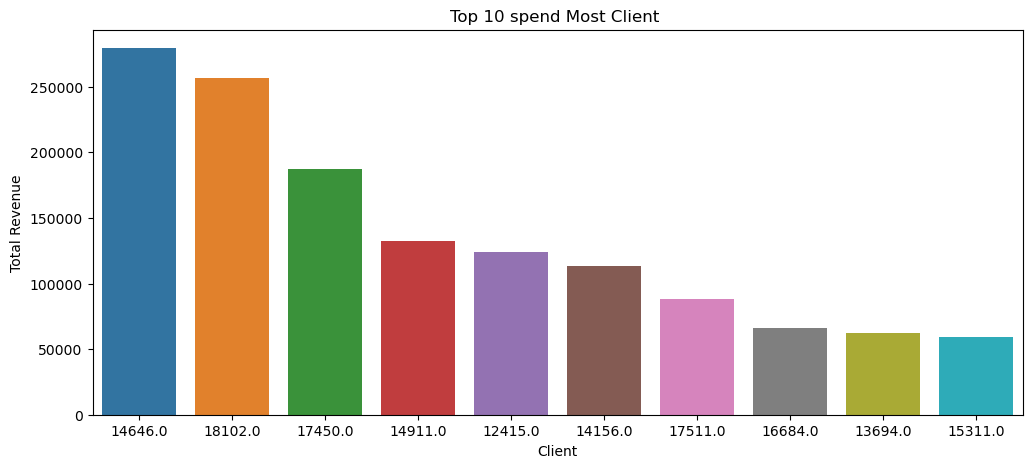

In [40]:
#Top ten clients
Rev_Customer=df.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).reset_index()[:10]
#Visualize
plt.figure(figsize=(12,5))
sns.barplot(x='CustomerID', y='Amount', data=Rev_Customer)
plt.title("Top 10 spend Most Client ")
plt.xlabel('Client')
plt.ylabel('Total Revenue')

Text(0, 0.5, 'Total Revenue')

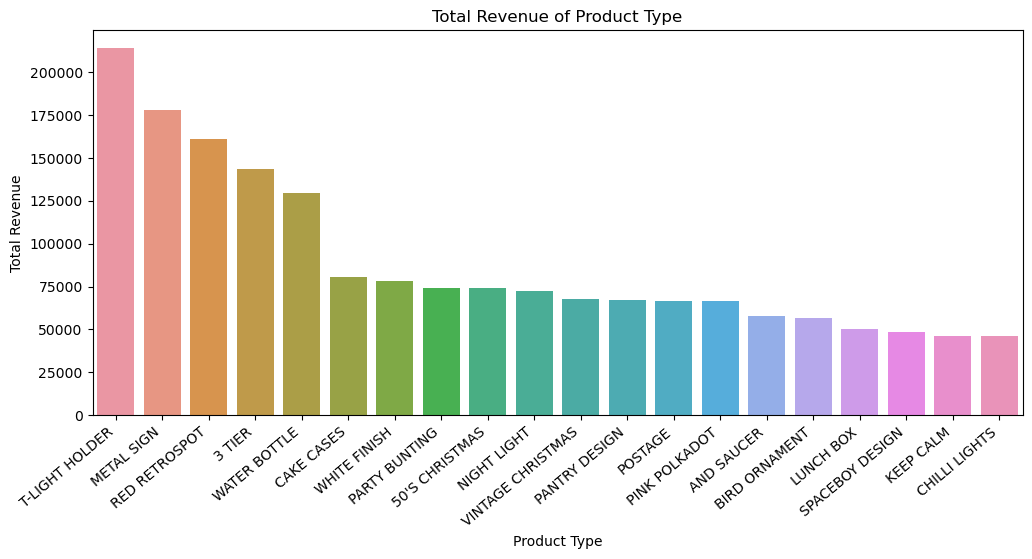

In [43]:
# Top 20 Most Selling Products
Rev_Country=df.groupby('Type')['Amount'].sum().sort_values(ascending=False).reset_index()[:20]
plt.figure(figsize=(12,5))
sns.barplot(x='Type', y='Amount', data=Rev_Country)
plt.xticks(rotation=40,ha='right')
plt.title("Total Revenue of Product Type")
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')

Text(0, 0.5, 'Total Revenue')

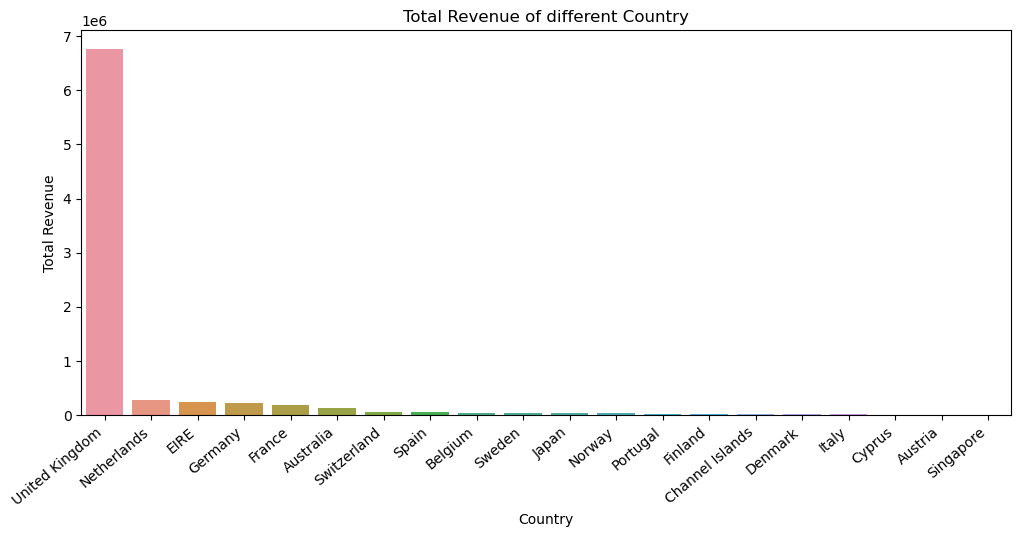

In [42]:
Rev_Country=df.groupby('Country')['Amount'].sum().sort_values(ascending=False).reset_index()[:20]
plt.figure(figsize=(12,5))
sns.barplot(x='Country', y='Amount', data=Rev_Country)
plt.xticks(rotation=40,ha='right')
plt.title("Total Revenue of different Country")
plt.xlabel('Country')
plt.ylabel('Total Revenue')

Text(0, 0.5, 'Total Revenue')

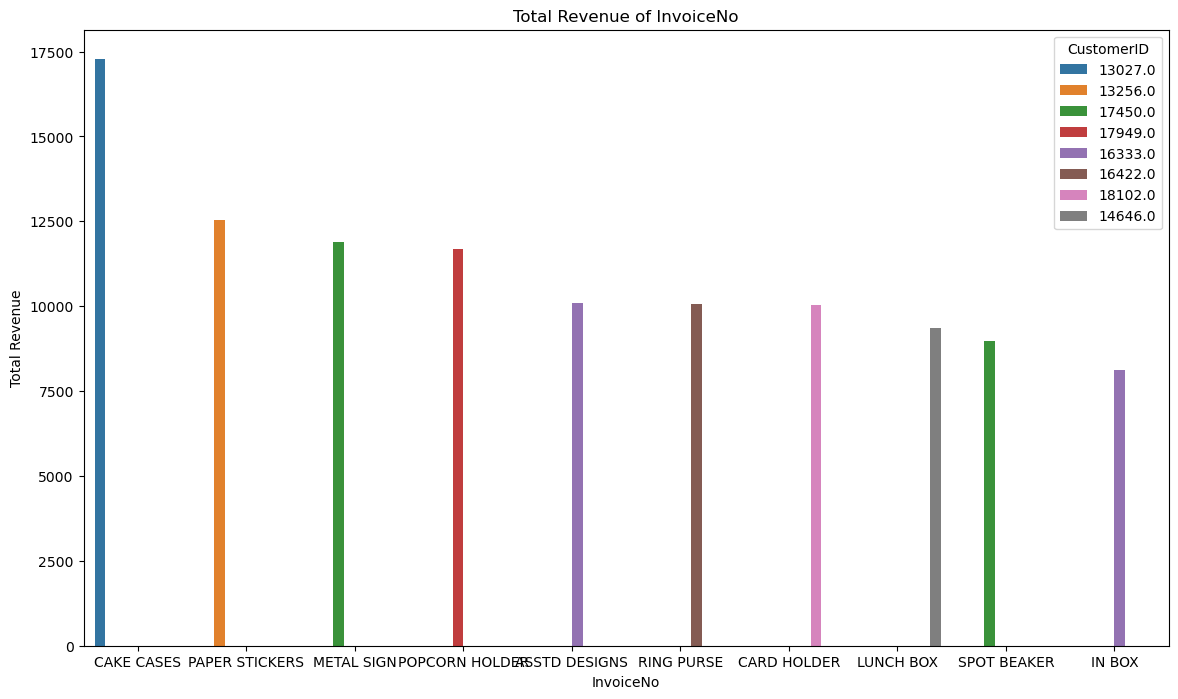

In [37]:
# Top10 type bought most by single client
Type_SingleClient=Most_customer_Type.sort_values(by='Quantity',ascending=False).reset_index()[:10]
#Visualize
plt.figure(figsize=(14,8))
sns.barplot(x='Type', y='Quantity',hue='CustomerID',data=Type_SingleClient)
plt.title("Total Revenue of InvoiceNo")
plt.xlabel('InvoiceNo')
plt.ylabel('Total Revenue')

In [45]:
# Compute the maximum date to know latest transaction date
max_date=max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [46]:
# Compute the minimum date to know the first transaction date
min_date=min(df['InvoiceDate'])
min_date

Timestamp('2010-12-01 08:26:00')

In [47]:
# Compute the difference between the latest date and the transaction date
df['Diff']=max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Type,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,T-LIGHT HOLDER,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,METAL LANTERN,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,COAT HANGER,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,WATER BOTTLE,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,WHITE HEART.,373 days 04:24:00


In [48]:
# Compute the last transaction date to get the recency of the customers
rfm_p=df.groupby('CustomerID')['Diff'].min()
rfm_p=rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [49]:
# Extract the number of days only
rfm_p['Diff']=rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [50]:
rfm_p['CustomerID']=rfm_p.CustomerID.astype(str)

In [51]:
# Merge the dataframes to get the final RFM datframe
rfm=pd.merge(rfm,rfm_p,on='CustomerID',how='inner')
rfm.columns=['CustomerID','Amount','Frequency','Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


# Outlier analysis for Amount, Frequency , Recency

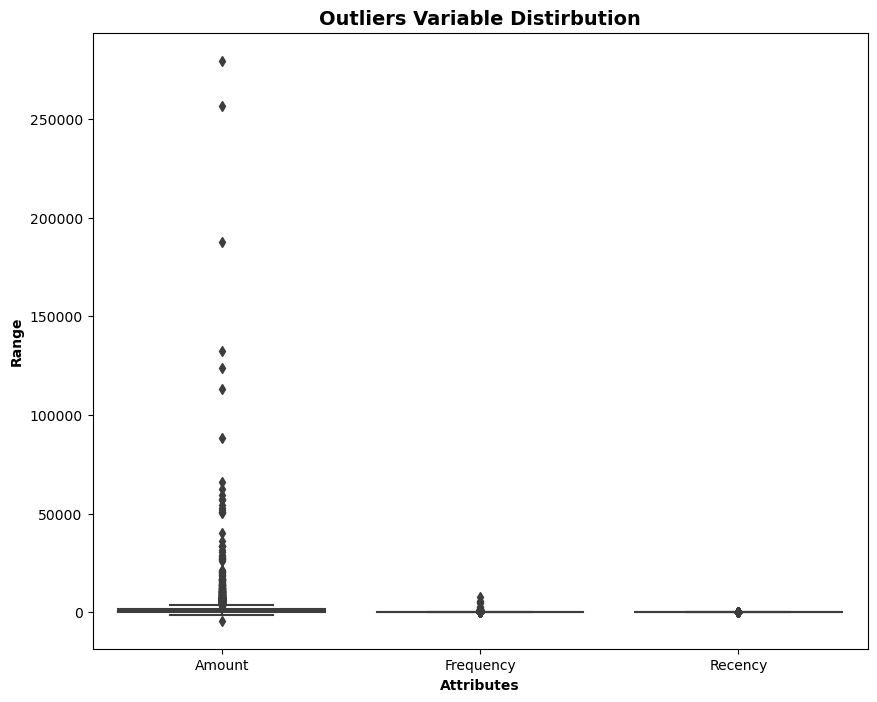

In [53]:
attributes=['Amount','Frequency','Recency']
plt.rcParams['figure.figsize']=[10,8]
sns.boxplot(data=rfm[attributes])
plt.title("Outliers Variable Distirbution",fontsize=14,fontweight='bold')
plt.ylabel("Range",fontweight='bold')
plt.xlabel("Attributes",fontweight='bold')
plt.show()

In [54]:
# Removing (statistical) outliers for Amount
Q1=rfm.Amount.quantile(0.25)
Q3=rfm.Amount.quantile(0.75)
IQR=Q3-Q1
rfm=rfm[(rfm.Amount >= Q1 - (1.5 * IQR)) & (rfm.Amount <= Q3 + (1.5 * IQR))]

In [55]:
# Removing (statistical) outliers for Recency
Q1=rfm.Recency.quantile(0.25)
Q3=rfm.Recency.quantile(0.75)
IQR=Q3-Q1
rfm=rfm[(rfm.Recency >= Q1 - (1.5 * IQR)) & (rfm.Recency <= Q3 + (1.5 * IQR))]

In [56]:
# Removing (statistical) outliers for Frequency
Q1=rfm.Frequency.quantile(0.25)
Q3=rfm.Frequency.quantile(0.75)
IQR=Q3-Q1
rfm=rfm[(rfm.Frequency >= Q1 - (1.5 * IQR)) & (rfm.Frequency <= Q3 + (1.5 * IQR))]

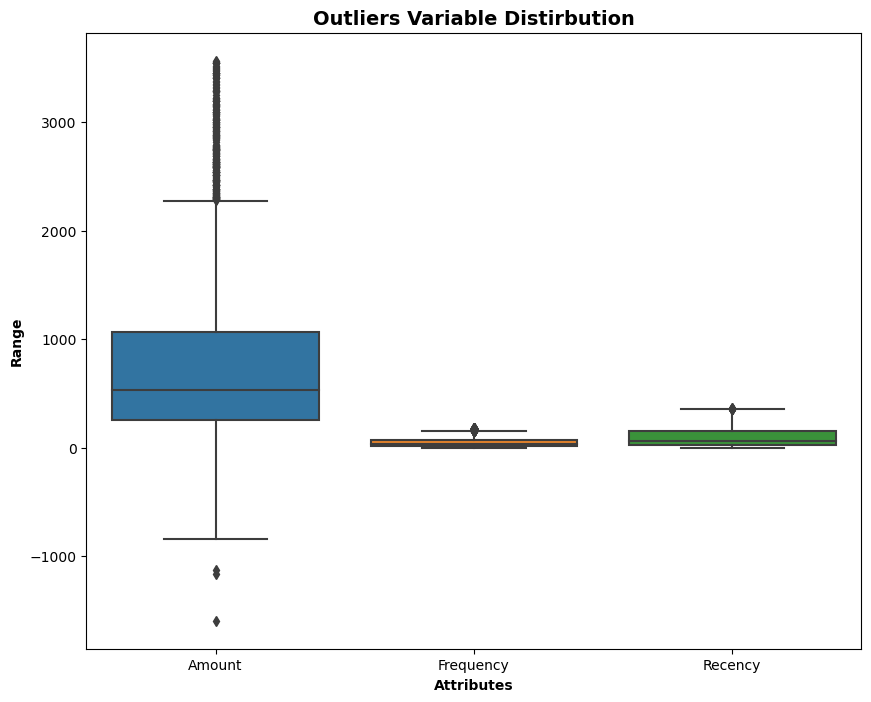

In [57]:
attributes=['Amount','Frequency','Recency']
plt.rcParams['figure.figsize']=[10,8]
sns.boxplot(data=rfm[attributes])
plt.title("Outliers Variable Distirbution",fontsize=14,fontweight='bold')
plt.ylabel("Range",fontweight='bold')
plt.xlabel("Attributes",fontweight='bold')
plt.show()

# Rescaling

In [59]:
rfm_df=rfm[['Amount','Frequency','Recency']]
scaler=StandardScaler()
rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(3629, 3)

In [60]:
# Converting the fit data to dataframe
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns=['Amount','Frequency','Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-1.056277,-1.076164,2.351537
1,1.355840,-0.393805,-0.239067
2,1.302571,0.594439,-0.817050
3,-0.607471,-0.723220,2.186399
4,1.017853,1.112091,-0.641591


# Building the Model-K-Means Clustering

In [68]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=4)

In [69]:
kmeans.labels_

array([1, 0, 0, ..., 1, 3, 0])

In [70]:
from sklearn.metrics import silhouette_score
score=silhouette_score(rfm_df_scaled,kmeans.labels_)
score

0.40797293134422385